In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

In [6]:
df = pd.read_csv("train.csv")
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [8]:
df.shape

(17996, 17)

In [9]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

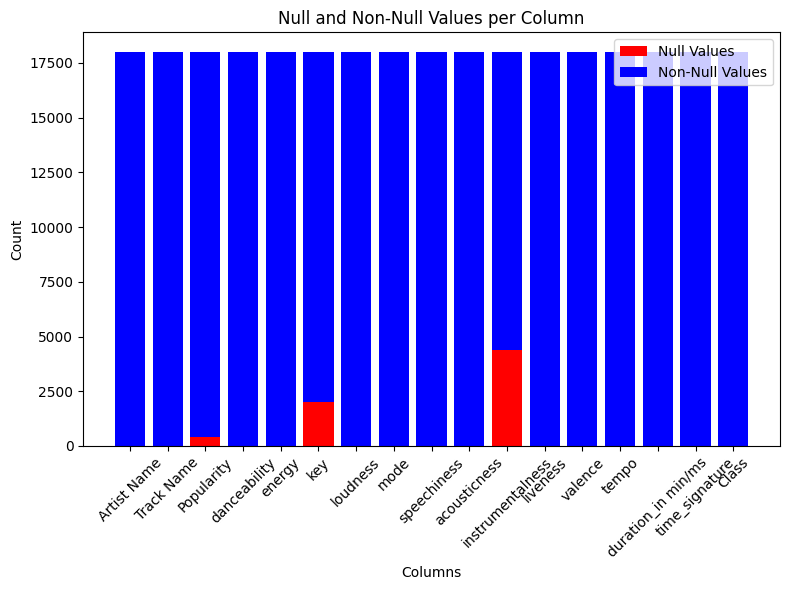

In [10]:
# Calculate the number of null and non-null values in each column
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

# Create a subplot for both null and non-null values
fig, ax = plt.subplots(figsize=(8, 6))

# Plot null values in red
ax.bar(null_counts.index, null_counts, color='red', label='Null Values')

# Plot non-null values in blue on top of null values
ax.bar(non_null_counts.index, non_null_counts, color='blue', bottom=null_counts, label='Non-Null Values')

# Set labels and legend
ax.set_xlabel('Columns')
ax.set_ylabel('Count')
ax.set_title('Null and Non-Null Values per Column')
ax.legend()

# Adjust layout and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


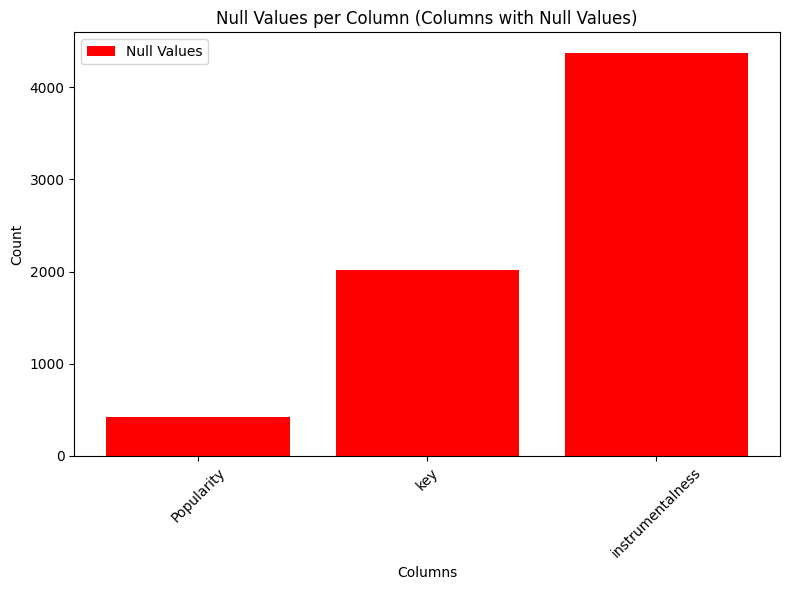

In [11]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

# Filter columns with null values
columns_with_null = null_counts[null_counts > 0].index

# Create a subplot for the null values
fig, ax = plt.subplots(figsize=(8, 6))

# Plot null values only for columns with null values
ax.bar(columns_with_null, null_counts[columns_with_null], color='red', label='Null Values')

# Set labels and legend
ax.set_xlabel('Columns')
ax.set_ylabel('Count')
ax.set_title('Null Values per Column (Columns with Null Values)')
ax.legend()

# Adjust layout and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Class
Rock             4949
Indie            2587
Pop              2524
Metal            1854
HipHop           1447
Alt_Music        1373
Blues            1272
Acoustic/Folk     625
Instrumental      576
Bollywood         402
Country           387
Name: count, dtype: int64


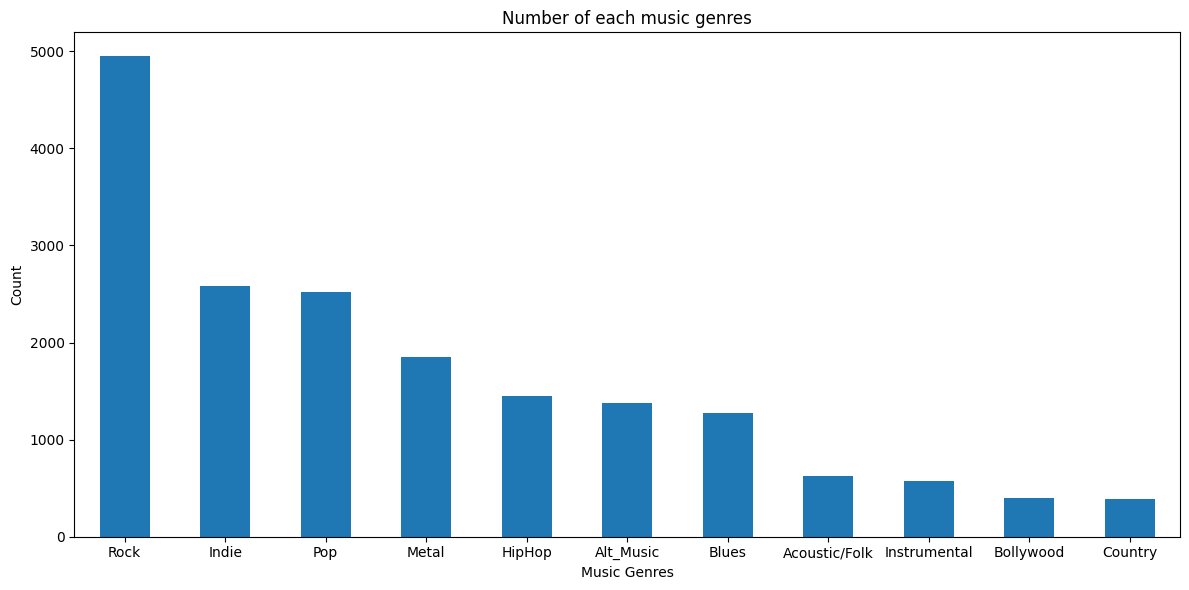

In [12]:

class_dict = {0: 'Acoustic/Folk', 1: 'Alt_Music', 2: 'Blues', 3: 'Bollywood', 4: 'Country', 5: 'HipHop', 6: 'Indie', 7: 'Instrumental', 8: 'Metal', 9: 'Pop', 10: 'Rock',}
label_renamed_df = df['Class'].replace(class_dict)


# Calculate the number of null values in each column
class_count = label_renamed_df.value_counts()
print(class_count)


# Create a bar graph to display the counts
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the counts
class_count.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Music Genres')
ax.set_ylabel('Count')
ax.set_title('Number of each music genres')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
# Preprocessing data

# Drop unrelavant column
# thinking that artist's name has some relationships with genres of song so I don't drop it
columns_to_drop = ['Track Name']
nonfeature_dropped = df.drop(columns=columns_to_drop, axis=1)

# X is feature dataframe
X = nonfeature_dropped.iloc[:, :-1]

# y is label
y = nonfeature_dropped.iloc[:, -1]


# Specify the columns to fill with their respective means
columns_to_fill = ['Popularity', 'key', 'instrumentalness']

# Replace NaN values with the mean of the specified columns
X["Popularity"].fillna(X["Popularity"].mean(), inplace=True)
X["key"].fillna(X["key"].mean(), inplace=True)
X["instrumentalness"].fillna(X["instrumentalness"].mean(), inplace=True)

# Encode categorical variables using LabelEncoder
labelencoders = {}

for column in X.columns:
    if X[column].dtype == type(object):
        labelencoder = LabelEncoder()
        # Fit the label encoder and include 'Unknown' in the classes
        labelencoder.fit(list(X[column].astype(str).fillna('Unknown')) + ['Unknown'])
        X[column] = labelencoder.transform(X[column].astype(str).fillna('Unknown'))
        labelencoders[column] = labelencoder
X

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,1182,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4
1,1092,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4
2,7899,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4
3,1987,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4
4,6283,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,3042,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3
17992,5122,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4
17993,7032,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4
17994,797,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4


In [14]:
# Oversample the minority class using SMOTE

# before oversamlping
print('Original class distribution:', Counter(y))

# oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# after oversamlping
print('Resampled class distribution:', Counter(y))

Original class distribution: Counter({10: 4949, 6: 2587, 9: 2524, 8: 1854, 5: 1447, 1: 1373, 2: 1272, 0: 625, 7: 576, 3: 402, 4: 387})
Resampled class distribution: Counter({5: 4949, 10: 4949, 6: 4949, 2: 4949, 4: 4949, 8: 4949, 9: 4949, 3: 4949, 7: 4949, 1: 4949, 0: 4949})


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Create and configure the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(400, 400), max_iter=400, activation="relu", solver="adam", random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.761756061719324


In [21]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1010
           1       0.54      0.56      0.55       948
           2       0.80      0.81      0.80       972
           3       0.97      0.99      0.98      1019
           4       0.98      0.98      0.98       964
           5       0.83      0.89      0.86      1021
           6       0.49      0.38      0.43       980
           7       0.99      0.99      0.99      1010
           8       0.75      0.80      0.77       983
           9       0.61      0.65      0.63      1006
          10       0.38      0.34      0.36       975

    accuracy                           0.76     10888
   macro avg       0.75      0.76      0.75     10888
weighted avg       0.75      0.76      0.76     10888



In [22]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 969    0    0   11   13    0    0    8    0    7    2]
 [   0  530   43    0    0   14  139    0   36   73  113]
 [   0   33  788    1    0    8   30    0    4   50   58]
 [  10    0    0 1004    0    1    0    4    0    0    0]
 [  14    0    0    4  942    0    0    1    0    2    1]
 [   0   14   13    1    0  905   20    0    0   56   12]
 [   1  205   39    1    0   42  376    0   39  118  159]
 [   5    0    0    2    0    0    0 1002    0    0    1]
 [   0   24    6    0    0    1   30    0  786    7  129]
 [  13   55   31    8    6   87   59    0    8  657   82]
 [   6  127   70    1    4   29  117    0  180  106  335]]


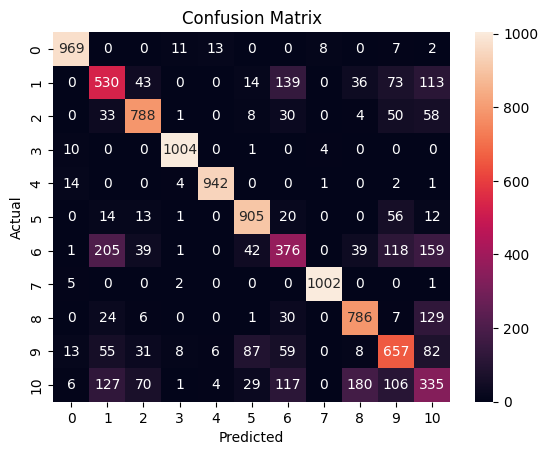

In [19]:
# confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Load the test data
test_data = pd.read_csv('test.csv')

In [25]:
# Preprocessing test data (just the same with training data)
columns_to_drop = ['Track Name']
X = test_data.drop(columns=columns_to_drop, axis=1)



# Specify the columns to fill with their respective means
columns_to_fill = ['Popularity', 'key', 'instrumentalness']

# Replace NaN values with the mean of the specified columns
X["Popularity"].fillna(X["Popularity"].mean(), inplace=True)
X["key"].fillna(X["key"].mean(), inplace=True)
X["instrumentalness"].fillna(X["instrumentalness"].mean(), inplace=True)

labelencoders = {}

# Encode categorical variables using LabelEncoder
for column in X.columns:
    if X[column].dtype == type(object):
        labelencoder = LabelEncoder()
        # Fit the label encoder and include 'Unknown' in the classes
        labelencoder.fit(list(X[column].astype(str).fillna('Unknown')) + ['Unknown'])
        X[column] = labelencoder.transform(X[column].astype(str).fillna('Unknown'))
        labelencoders[column] = labelencoder

# Impute and scale the test data
X_test_scaled = scaler.transform(X)
X_test_scaled

array([[-1.3470325 ,  1.86126843, -1.53520237, ...,  0.53594951,
         1.3360017 ,  0.38840621],
       [-1.38784253, -0.55525802, -0.21713587, ...,  1.18540961,
         0.58328468,  0.38840621],
       [-0.50375604,  2.17107952,  1.02224009, ...,  0.07235769,
         0.44870184,  0.38840621],
       ...,
       [-0.27812366, -0.30740915,  1.71078229, ...,  0.56362885,
        -1.11633595,  0.38840621],
       [-0.13764299,  0.49809967,  1.68455211, ...,  0.49037532,
         0.5902787 ,  0.38840621],
       [-0.6713126 ,  0.12632637,  0.56321195, ...,  1.33719957,
         0.42527534,  0.38840621]])

In [28]:
# Make predictions with the trained model
test_predictions = clf.predict(X_test_scaled)
test_data["prediction"] = test_predictions

# Output or use the test_predictions as needed
print(test_predictions)
pd.DataFrame(test_data).to_csv('predictions_neuralnet.csv', index=False)

test_data

[10  8  9 ...  3  1  5]


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,prediction
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4,10
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4,8
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4,9
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4,9
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,Dudu Aharon,◊ë◊ó◊ï◊® ◊®◊í◊ô◊©,28.0,0.816,0.927,7.0,-1.581,1,0.0600,0.26400,NaN,0.0735,0.643,128.019,231680.000000,4,9
7709,Elephant Tree,Echoes,45.0,0.429,0.599,7.0,-7.236,0,0.0363,0.02540,0.009330,0.3620,0.257,127.446,367879.000000,4,6
7710,Shankar Mahadevan,Man Mohini,38.0,0.805,0.905,6.0,-7.222,0,0.2750,0.15900,0.000011,0.0590,0.691,135.224,2.453550,4,3
7711,Talking Heads,Life During Wartime - 2005 Remaster,51.0,0.801,0.930,9.0,-7.365,1,0.0354,0.08060,0.152000,0.0558,0.967,133.255,221320.000000,4,1
